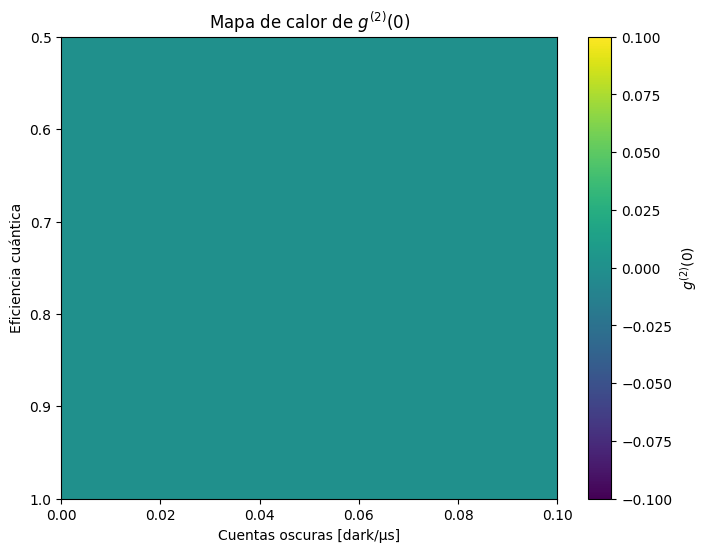

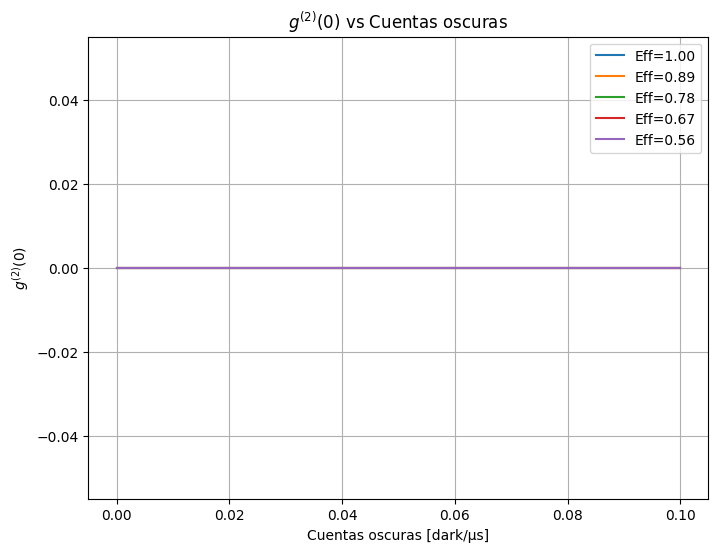

In [5]:
# AnalisisResultados.ipynb

import pickle
import numpy as np
import matplotlib.pyplot as plt

# Cargar resultados
g2 = np.zeros((10,10))
for i in range(9):
    with open("Res/resultados_simulacion_%i.pkl" %i, "rb") as f:
        resultados = pickle.load(f)

    g2 = resultados["g2"] + g2

    # Extraer datos
eficiencias = resultados["eficiencias"]
dark_rates = resultados["dark_rates"]
g2 = g2


# Graficar
plt.figure(figsize=(8, 6))
plt.imshow(g2, aspect="auto", cmap="viridis", origin="lower",
           extent=[dark_rates[0], dark_rates[-1], eficiencias[0], eficiencias[-1]])
plt.colorbar(label="$g^{(2)}(0)$")
plt.xlabel("Cuentas oscuras [dark/μs]")
plt.ylabel("Eficiencia cuántica")
plt.title("Mapa de calor de $g^{(2)}(0)$")
plt.show()

# También podrías hacer cortes por eficiencia o por tasa de cuentas oscuras
plt.figure(figsize=(8, 6))
for i, eta in enumerate(eficiencias[::len(eficiencias)//4]):
    idx = np.where(eficiencias == eta)[0][0]
    plt.plot(dark_rates, g2[idx], label=f"Eff={eta:.2f}")

plt.xlabel("Cuentas oscuras [dark/μs]")
plt.ylabel("$g^{(2)}(0)$")
plt.title("$g^{(2)}(0)$ vs Cuentas oscuras")
plt.legend()
plt.grid(True)
plt.show()